#Import necessary Libraries and Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset
df = pd.read_csv('food_trucks.csv')
df.head()

,Name,Address,Rating,Website,Opening Hours,Cuisine Type
0,big Jerry Indy food truck,"8522 Madison Ave, Indianapolis, IN 46227, Unit...",5.0,NaN,"Monday: 11:00 AM – 7:00 PM, Tuesday: 11:00 AM ...","Latin American, Empanadas, Tacos"
1,Pico de Gallo Food Truck,"3014 Lafayette Rd #3000, Indianapolis, IN 4622...",4.5,https://www.facebook.com/peregrino1982/,"Monday: Closed, Tuesday: Closed, Wednesday: 5:...","Mexican, Food Trucks"
2,The Latin Flavor - Food Truck,"9130 E 38th St, Indianapolis, IN 46235, United...",4.1,http://thelatinflavorindy.com/?utm_source=gmb&...,"Monday: 11:00 AM – 10:00 PM, Tuesday: 11:00 AM...","Tacos, Latin American"
3,Mi Lindo Pénjamo - Food Truck,"7910 Michigan Rd, Indianapolis, IN 46268, Unit...",4.5,https://store.kahero.co/milindopenjamo,"Monday: Closed, Tuesday: 7:30 PM – 12:00 AM, W...","Tacos, Food Trucks"
4,Super Tacos food truck,"7202 E Washington St, Indianapolis, IN 46219, ...",4.6,NaN,NaN,Tacos


#Handling Missing Data  

In [2]:
# Check for missing data in each column
missing_data = df.isnull().sum()

# Handle missing data
df['Website'].fillna('Not Available', inplace=True)
df['Opening Hours'].fillna('Not Specified', inplace=True)
df['Cuisine Type'].fillna('Unknown', inplace=True)

# Check if there are any missing values left
missing_data_after = df.isnull().sum()

df.head()

,Name,Address,Rating,Website,Opening Hours,Cuisine Type
0,big Jerry Indy food truck,"8522 Madison Ave, Indianapolis, IN 46227, Unit...",5.0,Not Available,"Monday: 11:00 AM – 7:00 PM, Tuesday: 11:00 AM ...","Latin American, Empanadas, Tacos"
1,Pico de Gallo Food Truck,"3014 Lafayette Rd #3000, Indianapolis, IN 4622...",4.5,https://www.facebook.com/peregrino1982/,"Monday: Closed, Tuesday: Closed, Wednesday: 5:...","Mexican, Food Trucks"
2,The Latin Flavor - Food Truck,"9130 E 38th St, Indianapolis, IN 46235, United...",4.1,http://thelatinflavorindy.com/?utm_source=gmb&...,"Monday: 11:00 AM – 10:00 PM, Tuesday: 11:00 AM...","Tacos, Latin American"
3,Mi Lindo Pénjamo - Food Truck,"7910 Michigan Rd, Indianapolis, IN 46268, Unit...",4.5,https://store.kahero.co/milindopenjamo,"Monday: Closed, Tuesday: 7:30 PM – 12:00 AM, W...","Tacos, Food Trucks"
4,Super Tacos food truck,"7202 E Washington St, Indianapolis, IN 46219, ...",4.6,Not Available,Not Specified,Tacos


#Data Transformation   

In [3]:
import re
# Extracting opening hours for each day
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def extract_hours(opening_hours_str, day):
    if not isinstance(opening_hours_str, str):
        return ("Closed", "Closed")
    
    pattern = f"{day}: (\\d+:\\d+ [APMapm]+) – (\\d+:\\d+ [APMapm]+)"
    match = re.search(pattern, opening_hours_str)
    if match:
        return match.groups()
    else:
        return ("Closed", "Closed")

# For each day, create columns for open and close hours
for day in days:
    df[f'{day}_Open'], df[f'{day}_Close'] = zip(*df['Opening Hours'].apply(lambda x: extract_hours(x, day)))

df.head()


,Name,Address,Rating,Website,Opening Hours,Cuisine Type,Monday_Open,Monday_Close,Tuesday_Open,Tuesday_Close,Wednesday_Open,Wednesday_Close,Thursday_Open,Thursday_Close,Friday_Open,Friday_Close,Saturday_Open,Saturday_Close,Sunday_Open,Sunday_Close
0,big Jerry Indy food truck,"8522 Madison Ave, Indianapolis, IN 46227, Unit...",5.0,Not Available,"Monday: 11:00 AM – 7:00 PM, Tuesday: 11:00 AM ...","Latin American, Empanadas, Tacos",11:00 AM,7:00 PM,11:00 AM,7:30 PM,11:00 AM,7:00 AM,10:30 AM,7:30 PM,10:30 AM,7:00 PM,11:00 AM,8:30 PM,Closed,Closed
1,Pico de Gallo Food Truck,"3014 Lafayette Rd #3000, Indianapolis, IN 4622...",4.5,https://www.facebook.com/peregrino1982/,"Monday: Closed, Tuesday: Closed, Wednesday: 5:...","Mexican, Food Trucks",Closed,Closed,Closed,Closed,5:00 PM,1:00 AM,5:00 PM,1:00 AM,5:00 PM,4:00 AM,5:00 PM,4:00 AM,5:00 PM,1:00 AM
2,The Latin Flavor - Food Truck,"9130 E 38th St, Indianapolis, IN 46235, United...",4.1,http://thelatinflavorindy.com/?utm_source=gmb&...,"Monday: 11:00 AM – 10:00 PM, Tuesday: 11:00 AM...","Tacos, Latin American",11:00 AM,10:00 PM,11:00 AM,10:00 PM,11:00 AM,10:00 PM,11:00 AM,11:00 PM,11:00 AM,11:00 PM,11:00 AM,11:00 PM,11:00 AM,10:00 PM
3,Mi Lindo Pénjamo - Food Truck,"7910 Michigan Rd, Indianapolis, IN 46268, Unit...",4.5,https://store.kahero.co/milindopenjamo,"Monday: Closed, Tuesday: 7:30 PM – 12:00 AM, W...","Tacos, Food Trucks",Closed,Closed,7:30 PM,12:00 AM,7:30 PM,12:00 AM,7:30 PM,12:00 AM,7:30 PM,12:00 AM,Closed,Closed,Closed,Closed
4,Super Tacos food truck,"7202 E Washington St, Indianapolis, IN 46219, ...",4.6,Not Available,Not Specified,Tacos,Closed,Closed,Closed,Closed,Closed,Closed,Closed,Closed,Closed,Closed,Closed,Closed,Closed,Closed


In [4]:
from datetime import datetime, timedelta

def calculate_hours(open_time, close_time):
    # If the food truck is closed on that day, return 0 hours
    if open_time == "Closed" or close_time == "Closed":
        return 0
    
    # Convert the 12-hour time format to 24-hour format
    open_24hr = datetime.strptime(open_time, "%I:%M %p").time()
    close_24hr = datetime.strptime(close_time, "%I:%M %p").time()
    
    # Calculate the number of hours the food truck is open
    if close_24hr > open_24hr:
        delta = datetime.combine(datetime.today(), close_24hr) - datetime.combine(datetime.today(), open_24hr)
    else:  # If the food truck operates past midnight
        delta = datetime.combine(datetime.today() + timedelta(days=1), close_24hr) - datetime.combine(datetime.today(), open_24hr)
    
    # Return the number of hours as a float (e.g., 7.5 for 7 hours 30 minutes)
    return delta.seconds / 3600

# For each day, calculate the number of hours the food truck is open
for day in days:
    df[f'{day}_Hours'] = df.apply(lambda x: calculate_hours(x[f'{day}_Open'], x[f'{day}_Close']), axis=1)

# Calculate the total weekly hours
df['Total_Weekly_Hours'] = df[[f'{day}_Hours' for day in days]].sum(axis=1)

# Drop the original 'Cuisine Type' column as we have granularized it
df.drop(columns=['Opening Hours'], inplace=True)

df.head()

,Name,Address,Rating,Website,Cuisine Type,Monday_Open,Monday_Close,Tuesday_Open,Tuesday_Close,Wednesday_Open,...,Sunday_Open,Sunday_Close,Monday_Hours,Tuesday_Hours,Wednesday_Hours,Thursday_Hours,Friday_Hours,Saturday_Hours,Sunday_Hours,Total_Weekly_Hours
0,big Jerry Indy food truck,"8522 Madison Ave, Indianapolis, IN 46227, Unit...",5.0,Not Available,"Latin American, Empanadas, Tacos",11:00 AM,7:00 PM,11:00 AM,7:30 PM,11:00 AM,...,Closed,Closed,8.0,8.5,20.0,9.0,8.5,9.5,0.0,63.5
1,Pico de Gallo Food Truck,"3014 Lafayette Rd #3000, Indianapolis, IN 4622...",4.5,https://www.facebook.com/peregrino1982/,"Mexican, Food Trucks",Closed,Closed,Closed,Closed,5:00 PM,...,5:00 PM,1:00 AM,0.0,0.0,8.0,8.0,11.0,11.0,8.0,46.0
2,The Latin Flavor - Food Truck,"9130 E 38th St, Indianapolis, IN 46235, United...",4.1,http://thelatinflavorindy.com/?utm_source=gmb&...,"Tacos, Latin American",11:00 AM,10:00 PM,11:00 AM,10:00 PM,11:00 AM,...,11:00 AM,10:00 PM,11.0,11.0,11.0,12.0,12.0,12.0,11.0,80.0
3,Mi Lindo Pénjamo - Food Truck,"7910 Michigan Rd, Indianapolis, IN 46268, Unit...",4.5,https://store.kahero.co/milindopenjamo,"Tacos, Food Trucks",Closed,Closed,7:30 PM,12:00 AM,7:30 PM,...,Closed,Closed,0.0,4.5,4.5,4.5,4.5,0.0,0.0,18.0
4,Super Tacos food truck,"7202 E Washington St, Indianapolis, IN 46219, ...",4.6,Not Available,Tacos,Closed,Closed,Closed,Closed,Closed,...,Closed,Closed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Splitting the 'Cuisine Type' column and creating dummy variables
cuisine_dummies = df['Cuisine Type'].str.get_dummies(sep=', ').add_prefix('Cuisine_')

# Merge the dummy variables with the original dataframe
df = pd.concat([df, cuisine_dummies], axis=1)

df['Cuisine_Mexican'] = df['Cuisine_Mexican'] | df['Cuisine_Tacos']

# Columns to remove based on the specified cuisines/services
columns_to_remove = [
    'Cuisine Type',
    'Cuisine_Wine & Spirits',
    'Cuisine_Beer',
    'Cuisine_Cocktail Bars',
    'Cuisine_Desserts',
    'Cuisine_Food Delivery Services',
    'Cuisine_Food Stands',
    'Cuisine_Sushi Bars',
    'Cuisine_Bakeries',
    'Cuisine_Food Trucks',
    'Cuisine_Unknown',
    'Cuisine_Tacos'
]

# Removing the specified columns
df.drop(columns=columns_to_remove, inplace=True)


df.head()

,Name,Address,Rating,Website,Monday_Open,Monday_Close,Tuesday_Open,Tuesday_Close,Wednesday_Open,Wednesday_Close,...,Sunday_Hours,Total_Weekly_Hours,Cuisine_American (New),Cuisine_Barbeque,Cuisine_Empanadas,Cuisine_Latin American,Cuisine_Mexican,Cuisine_Tacos,Cuisine_Vegetarian,Cuisine_Venezuelan
0,big Jerry Indy food truck,"8522 Madison Ave, Indianapolis, IN 46227, Unit...",5.0,Not Available,11:00 AM,7:00 PM,11:00 AM,7:30 PM,11:00 AM,7:00 AM,...,0.0,63.5,0,0,1,1,1,1,0,0
1,Pico de Gallo Food Truck,"3014 Lafayette Rd #3000, Indianapolis, IN 4622...",4.5,https://www.facebook.com/peregrino1982/,Closed,Closed,Closed,Closed,5:00 PM,1:00 AM,...,8.0,46.0,0,0,0,0,1,0,0,0
2,The Latin Flavor - Food Truck,"9130 E 38th St, Indianapolis, IN 46235, United...",4.1,http://thelatinflavorindy.com/?utm_source=gmb&...,11:00 AM,10:00 PM,11:00 AM,10:00 PM,11:00 AM,10:00 PM,...,11.0,80.0,0,0,0,1,1,1,0,0
3,Mi Lindo Pénjamo - Food Truck,"7910 Michigan Rd, Indianapolis, IN 46268, Unit...",4.5,https://store.kahero.co/milindopenjamo,Closed,Closed,7:30 PM,12:00 AM,7:30 PM,12:00 AM,...,0.0,18.0,0,0,0,0,1,1,0,0
4,Super Tacos food truck,"7202 E Washington St, Indianapolis, IN 46219, ...",4.6,Not Available,Closed,Closed,Closed,Closed,Closed,Closed,...,0.0,0.0,0,0,0,0,1,1,0,0


In [6]:
df.to_csv('Cleaned_food_trucks.csv')

#EDA

In [7]:
print(df.shape)

print(df.describe())

print(df.dtypes)

(20, 34)
          Rating  Monday_Hours  Tuesday_Hours  Wednesday_Hours  \
count  20.000000     20.000000      20.000000        20.000000   
mean    4.055000      2.900000       3.675000         4.650000   
std     1.298369      4.822098       5.019108         6.104571   
min     0.000000      0.000000       0.000000         0.000000   
25%     4.000000      0.000000       0.000000         0.000000   
50%     4.500000      0.000000       0.000000         0.000000   
75%     4.725000      6.250000       7.375000         8.625000   
max     5.000000     14.000000      14.000000        20.000000   

       Thursday_Hours  Friday_Hours  Saturday_Hours  Sunday_Hours  \
count       20.000000     20.000000       20.000000     20.000000   
mean         4.450000      7.000000        6.200000      3.275000   
std          5.049492      5.286527        5.442039      4.722497   
min          0.000000      0.000000        0.000000      0.000000   
25%          0.000000      0.000000        0.000000

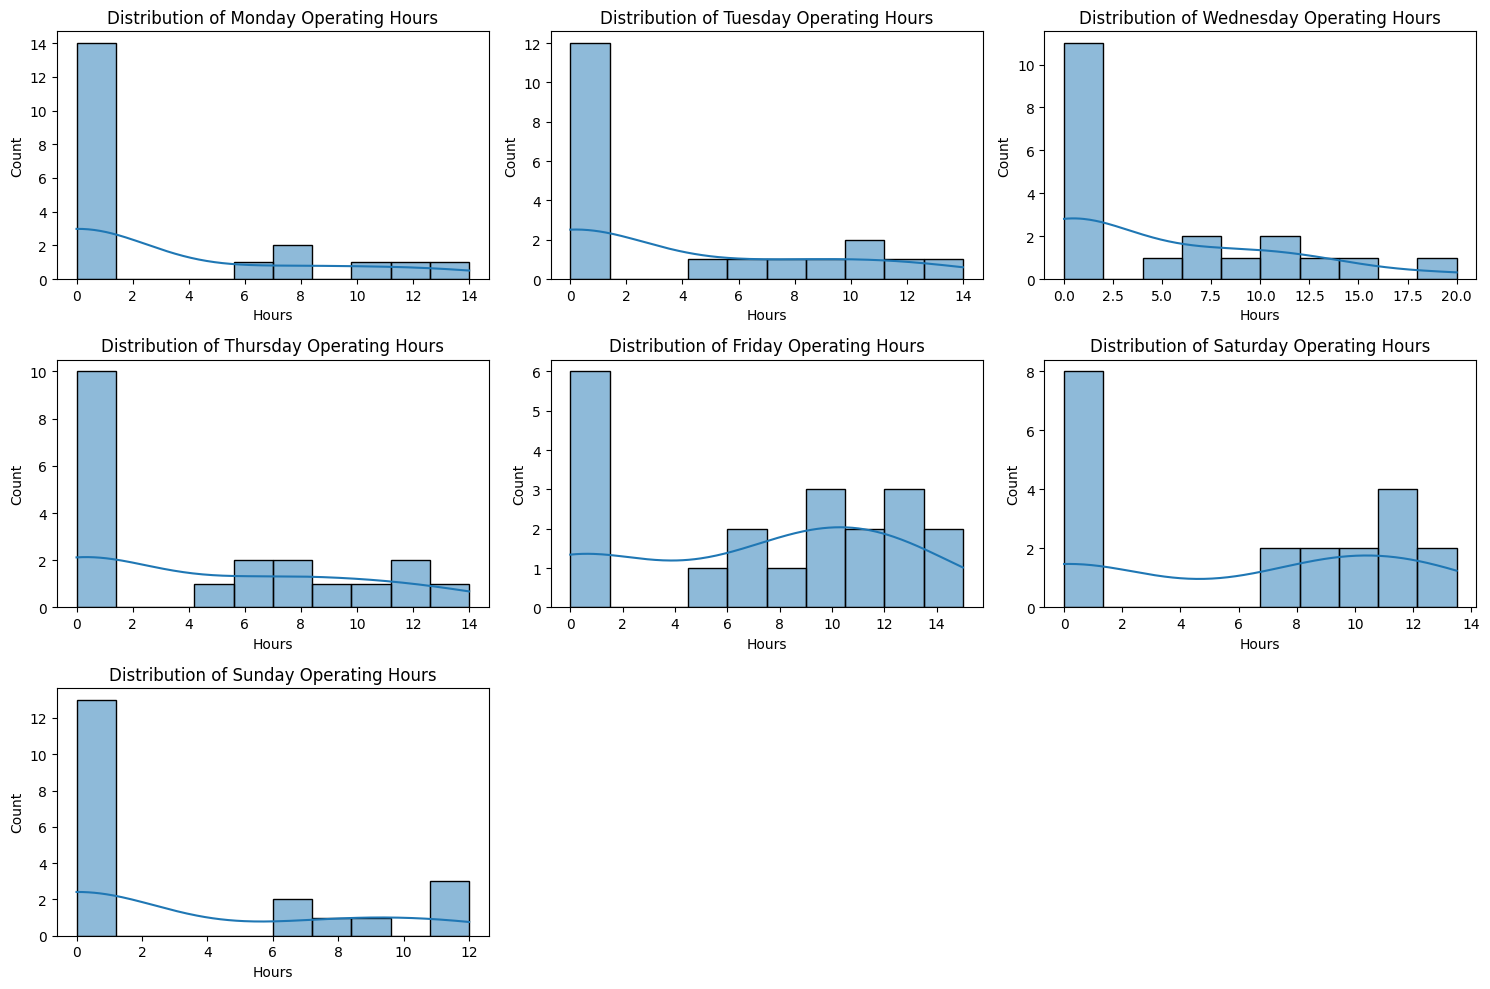

In [8]:
# Plotting distribution of operating hours for each day
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15, 10))
for idx, day in enumerate(days_of_week):
    plt.subplot(3, 3, idx+1)
    sns.histplot(df[f'{day}_Hours'], bins=10, kde=True)
    plt.title(f'Distribution of {day} Operating Hours')
    plt.xlabel('Hours')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

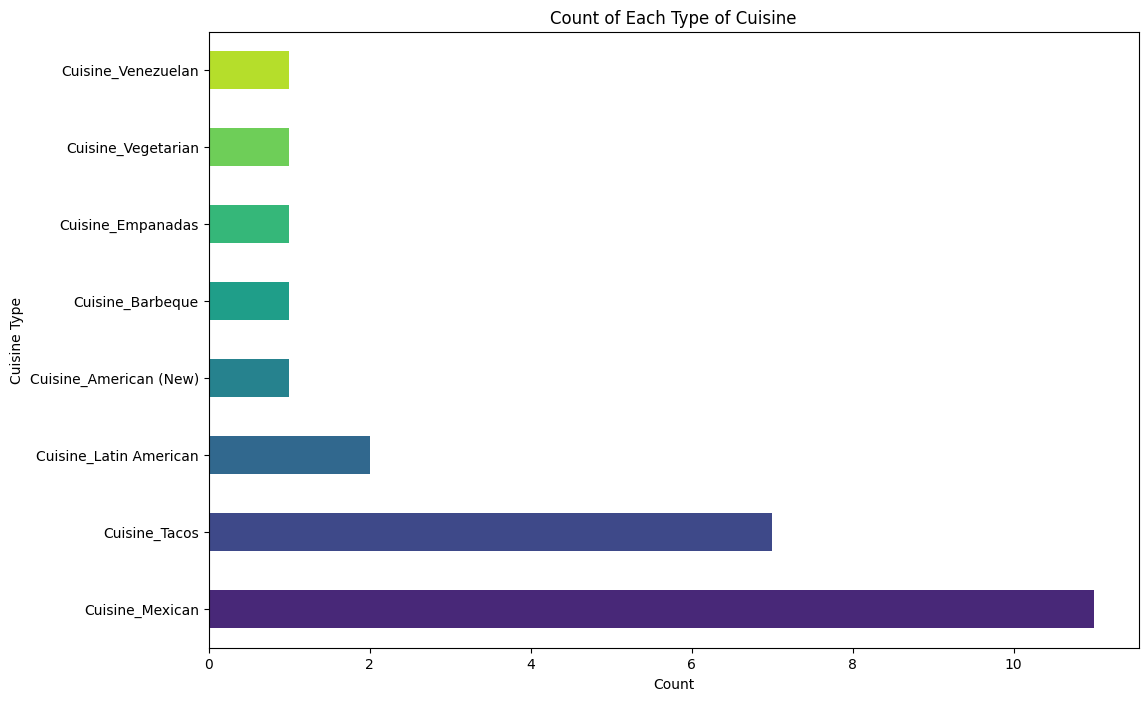

In [9]:
# Extracting columns related to cuisine
cuisine_columns = [col for col in df.columns if 'Cuisine_' in col]

# Counting the number of trucks offering each type of cuisine
cuisine_counts = df[cuisine_columns].sum().sort_values(ascending=False)

# Plotting the count of each type of cuisine
plt.figure(figsize=(12, 8))
cuisine_counts.plot(kind='barh', color=sns.color_palette("viridis", len(cuisine_counts)))
plt.title('Count of Each Type of Cuisine')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.show()